In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yusufmatur","key":"d37103b58308c45d33a9146066832efc"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list





ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18067  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10772  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5411  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3864  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection


 33% 5.00M/15.1M [00:00<00:00, 49.5MB/s]
100% 15.1M/15.1M [00:00<00:00, 96.6MB/s]
unzip:  cannot find or open tumor.zip, tumor.zip.zip or tumor.zip.ZIP.


In [ ]:
! unzip tumor.zip -d tumor

In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


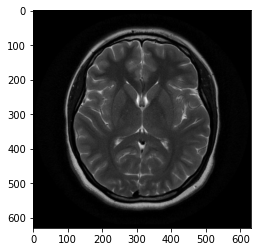

In [ ]:
DATADIR = "/content/tumor/brain_tumor_dataset"
CATEGORIES = ["yes","no"]

for category in CATEGORIES:
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    break
print(img_array)

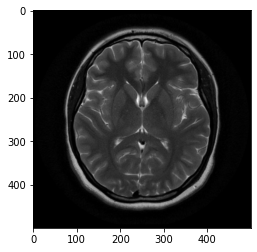

In [ ]:
IMG_SIZE=500
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [ ]:
training_data = []

def create_trainin_data():
  
  for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      reshaped_img =cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
      training_data.append([reshaped_img,class_num])

create_trainin_data()
print(len(training_data))

253


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
X = []
y = []

In [ ]:
for features,label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)


In [ ]:
X.shape

In [ ]:
y_t = np.array(y).reshape(-1,1)

In [ ]:
X_t = X/255.0  

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=X_t[0].shape),
  tf.keras.layers.Conv2D(64,(3,3),strides=2,activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3),strides=2,activation="relu",input_shape= (X_t[0].shape)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3),strides=2,activation="relu",input_shape= (X_t[0].shape)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256,activation="relu"),
  tf.keras.layers.Dense(128,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")

])

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=Adam(lr=0.01),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
r = model.fit(x=X_t,y=y_t,steps_per_epoch=10 ,epochs=15)

Epoch 1/15
10/10 [==============================] - 15s 1s/step - loss: 2.3810 - accuracy: 0.6166
Epoch 2/15
10/10 [==============================] - 14s 1s/step - loss: 0.6917 - accuracy: 0.5652
Epoch 3/15
10/10 [==============================] - 14s 1s/step - loss: 0.6697 - accuracy: 0.6126
Epoch 4/15
10/10 [==============================] - 14s 1s/step - loss: 0.6677 - accuracy: 0.6126
Epoch 5/15
10/10 [==============================] - 14s 1s/step - loss: 0.6538 - accuracy: 0.6126
Epoch 6/15
10/10 [==============================] - 14s 1s/step - loss: 0.6244 - accuracy: 0.6126
Epoch 7/15
10/10 [==============================] - 14s 1s/step - loss: 0.5989 - accuracy: 0.6443
Epoch 8/15
10/10 [==============================] - 14s 1s/step - loss: 0.5597 - accuracy: 0.7431
Epoch 9/15
10/10 [==============================] - 14s 1s/step - loss: 0.5805 - accuracy: 0.7352
Epoch 10/15
10/10 [==============================] - 14s 1s/step - loss: 0.5668 - accuracy: 0.6996
Epoch 11/15
10/10 [

In [ ]:
r = model.fit(x=X_t,y=y_t,steps_per_epoch=10 ,epochs=10)

Epoch 1/10
10/10 [==============================] - 15s 1s/step - loss: 0.4667 - accuracy: 0.7866
Epoch 2/10
10/10 [==============================] - 14s 1s/step - loss: 0.4193 - accuracy: 0.8063
Epoch 3/10
10/10 [==============================] - 14s 1s/step - loss: 0.3824 - accuracy: 0.8182
Epoch 4/10
10/10 [==============================] - 14s 1s/step - loss: 0.3437 - accuracy: 0.8340
Epoch 5/10
10/10 [==============================] - 14s 1s/step - loss: 0.2965 - accuracy: 0.8577
Epoch 6/10
10/10 [==============================] - 14s 1s/step - loss: 0.3222 - accuracy: 0.8419
Epoch 7/10
10/10 [==============================] - 14s 1s/step - loss: 0.2553 - accuracy: 0.8814
Epoch 8/10
10/10 [==============================] - 14s 1s/step - loss: 0.1984 - accuracy: 0.9209
Epoch 9/10
10/10 [==============================] - 14s 1s/step - loss: 0.1937 - accuracy: 0.9051
Epoch 10/10
10/10 [==============================] - 14s 1s/step - loss: 0.0922 - accuracy: 0.9644


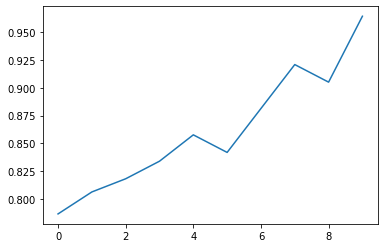

In [ ]:
plt.plot(r.history["accuracy"],label="accuracy")

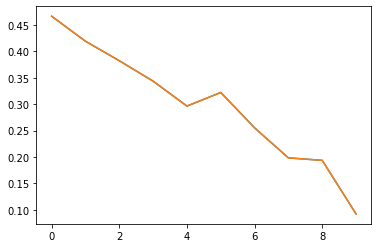

In [ ]:
plt.plot(r.history["loss"],label="loss")

In [ ]:
model.evaluate(X_t,y_t)

8/8 [==============================] - 4s 459ms/step - loss: 0.0603 - accuracy: 0.9881


[0.06026497110724449, 0.9881423115730286]

In [ ]:
a = model.predict(X_t[:10])
tf.math.round(a)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)>

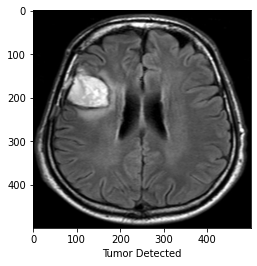

0.0


In [205]:
rnd=np.random.randint(len(X_t))
plt.imshow(X_t[rnd].reshape(500,500),"gray")

prd=np.round(model.predict(X_t[[rnd]]))
if prd[0][0] == 0 :
  diagnose="Tumor Detected"
else:
  diagnose = "Tumor is not detected"
plt.xlabel(f"{diagnose}")
plt.show()
print(prd[0][0])


In [ ]:
PATH="/content/test"
for img in os.listdir(PATH):
  image_data=cv2.imread(os.path.join(PATH,img),cv2.IMREAD_GRAYSCALE)
  plt.imshow(image_data,cmap="gray")
  plt.show()

In [216]:
test_data=[]

PATH="/content/test"
for img in os.listdir(PATH):
  image_data=cv2.imread(os.path.join(PATH,img),cv2.IMREAD_GRAYSCALE)
  test_data.append(cv2.resize(image_data,(500,500)))

In [218]:
test = np.reshape(np.array(test_data),(-1,500,500,1))

In [219]:
test.shape

(6, 500, 500, 1)

In [223]:
a=np.round(model.predict(test[[0]]))
print(a[0][0])

0.0


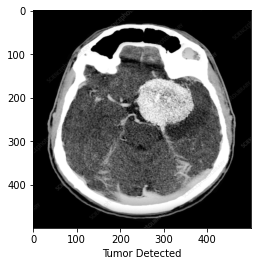

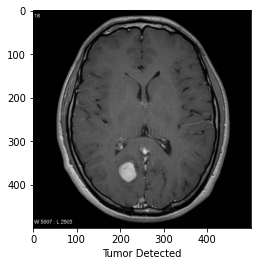

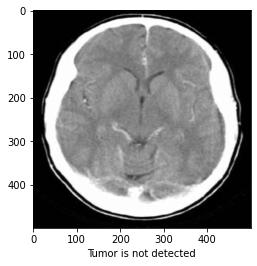

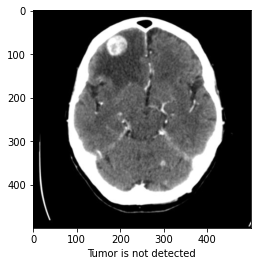

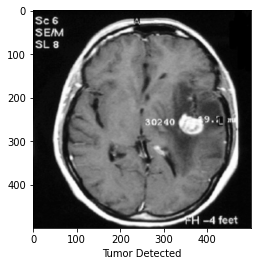

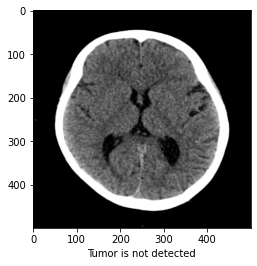

In [230]:
for i in range(len(test)):
  a=np.round(model.predict(test[[i]]))
  if a == 0:
    dgn="Tumor Detected"
  else:
    dgn="Tumor is not detected"
  plt.xlabel(dgn)
  plt.imshow(test[i].reshape(500,500),cmap="gray")
  plt.show()